# 📘 Enhanced Result Objects with Statistical Analysis> Access R², confidence intervals, and visualization with enhanced CurveFitResult⏱️ **20-25 minutes** | 📊 **Level: ●●○ Intermediate** | 🏷️ **Feature Demo**---

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/imewei/NLSQ/blob/main/examples/notebooks/05_feature_demos/result_enhancements_demo.ipynb)


In [1]:
# @title Install NLSQ (run once in Colab)
import sys

if 'google.colab' in sys.modules:
    print("Running in Google Colab - installing NLSQ...")
    !pip install -q nlsq
    print("✅ NLSQ installed successfully!")
else:
    print("Not running in Colab - assuming NLSQ is already installed")

Not running in Colab - assuming NLSQ is already installed


## 🎯 Learning ObjectivesAfter this tutorial, you'll be able to:1. Access statistical properties (R², RMSE, MAE, AIC, BIC)2. Compute confidence and prediction intervals3. Use backward-compatible result objects4. Generate summary reports and visualizations5. Compare multiple models systematically---

## 🔬 Feature Overview**What problem does this solve?**- Manual calculation of goodness-of-fit metrics is tedious- Confidence intervals require complex statistical code- Model comparison lacks standardized metrics- Visualization requires repetitive plotting code**Enhanced CurveFitResult provides:**- Statistical properties: R², RMSE, MAE, AIC, BIC- Confidence/prediction intervals- Built-in visualization with residual plots- Summary reports- Full backward compatibility with tuple unpacking---

## Setup

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
# MUST come before importing matplotlib
%matplotlib inline

In [3]:
from IPython.display import display

In [4]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

from nlsq import curve_fit

## Example 1: Basic Statistical PropertiesAccess common goodness-of-fit metrics directly.

In [5]:
def exponential(x, a, b, c):
    return a * jnp.exp(-b * x) + c

# Generate sample data
np.random.seed(42)
x = np.linspace(0, 10, 100)
y_true = 10 * np.exp(-0.5 * x) + 2
y = y_true + np.random.normal(0, 0.5, size=len(x))

# Fit model
result = curve_fit(exponential, x, y, p0=[10, 0.5, 2])

print('Fitted parameters:')
print(f'  a = {result.popt[0]:.4f}')
print(f'  b = {result.popt[1]:.4f}')
print(f'  c = {result.popt[2]:.4f}')

print('\nGoodness of fit:')
print(f'  R² = {result.r_squared:.6f}')
print(f'  Adjusted R² = {result.adj_r_squared:.6f}')
print(f'  RMSE = {result.rmse:.6f}')
print(f'  MAE = {result.mae:.6f}')

print('\nModel selection criteria:')
print(f'  AIC = {result.aic:.2f}')
print(f'  BIC = {result.bic:.2f}')

INFO:nlsq.curve_fit:Starting curve fit n_params=3 | n_data_points=100 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=3 | n_residuals=100 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=10.341328673359252 | grad_norm=39.3107 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=9.690298264461802 | grad_norm=3.9962 | step=10.21028892833107 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=9.682820246437306 | grad_norm=0.0317 | step=10.21028892833107 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=3 | cost=9.68281919678926 | grad_norm=8.0968e-04 | step=10.21028892833107 | nfev=4


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=1.376634s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=4 | final_cost=9.6828 | elapsed=1.377s | final_gradient_norm=2.2636e-05


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=2.267048s


INFO:nlsq.curve_fit:Curve fit completed total_time=2.2670 | final_cost=19.3656 | covariance_warning=False


Fitted parameters:
  a = 10.2597
  b = 0.5493
  c = 2.0721

Goodness of fit:
  R² = 0.970790
  Adjusted R² = 0.969878
  RMSE = 0.440064
  MAE = 0.351040

Model selection criteria:
  AIC = -158.17
  BIC = -150.35


## Example 2: Backward CompatibilityResult objects support both modern and traditional usage patterns.

In [6]:
def linear(x, a, b):
    return a * x + b

np.random.seed(42)
x = np.linspace(0, 10, 50)
y = 2 * x + 1 + np.random.normal(0, 0.5, size=len(x))

# Pattern 1: Traditional tuple unpacking (backward compatible)
popt, pcov = curve_fit(linear, x, y, p0=[1, 1])
print('Pattern 1 (tuple unpacking):')
print(f'  popt = {popt}')

# Pattern 2: Enhanced result object
result = curve_fit(linear, x, y, p0=[1, 1])
print('\nPattern 2 (enhanced result):')
print(f'  result.popt = {result.popt}')
print(f'  result.r_squared = {result.r_squared:.6f}')

# Pattern 3: Unpack enhanced result
popt2, pcov2 = result
print('\nPattern 3 (unpack enhanced result):')
print(f'  popt = {popt2}')
print(f'  Same as Pattern 1? {np.allclose(popt, popt2)}')

print('\n✓ All usage patterns work seamlessly!')

INFO:nlsq.curve_fit:Starting curve fit n_params=2 | n_data_points=50 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=2 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=2 | n_residuals=50 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=806.7366975766606 | grad_norm=1642.9163 | nfev=1


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.978502s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=1 | final_cost=5.1571 | elapsed=0.979s | final_gradient_norm=3.0953e-13


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=1.568661s


INFO:nlsq.curve_fit:Curve fit completed total_time=1.5687 | final_cost=10.3143 | covariance_warning=False


INFO:nlsq.curve_fit:Starting curve fit n_params=2 | n_data_points=50 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=2 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


Pattern 1 (tuple unpacking):
  popt = [1.9710083  1.03222155]


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=2 | n_residuals=50 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=806.7366975766606 | grad_norm=1642.9163 | nfev=1


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.311372s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=1 | final_cost=5.1571 | elapsed=0.311s | final_gradient_norm=3.0953e-13


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=0.602456s


INFO:nlsq.curve_fit:Curve fit completed total_time=0.6025 | final_cost=10.3143 | covariance_warning=False



Pattern 2 (enhanced result):
  result.popt = [1.9710083  1.03222155]
  result.r_squared = 0.993915

Pattern 3 (unpack enhanced result):
  popt = [1.9710083  1.03222155]
  Same as Pattern 1? True

✓ All usage patterns work seamlessly!


## Example 3: Confidence IntervalsQuantify parameter uncertainty with confidence intervals.

In [7]:
def power_law(x, a, b):
    return a * x**b

np.random.seed(42)
x = np.linspace(1, 10, 50)
y = 2 * x**1.5 + np.random.normal(0, 2, size=len(x))

# Fit model
result = curve_fit(power_law, x, y, p0=[2, 1.5])

# Get confidence intervals
ci_95 = result.confidence_intervals(alpha=0.95)
ci_99 = result.confidence_intervals(alpha=0.99)

print('Fitted parameters with confidence intervals:')
print('\nParameter    Value       95% CI                    99% CI')
print('-' * 70)
for i, (val, ci95, ci99) in enumerate(zip(result.popt, ci_95, ci_99, strict=False)):
    print(f'p{i:<11} {val:>8.4f}    [{ci95[0]:>7.4f}, {ci95[1]:>7.4f}]    [{ci99[0]:>7.4f}, {ci99[1]:>7.4f}]')

INFO:nlsq.curve_fit:Starting curve fit n_params=2 | n_data_points=50 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=2 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=2 | n_residuals=50 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=90.51411283292859 | grad_norm=1802.2142 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=82.55592503273331 | grad_norm=180.6529 | step=2.5 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=82.48660108840417 | grad_norm=0.1205 | step=2.5 | nfev=3


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.336232s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=3 | final_cost=82.4866 | elapsed=0.336s | final_gradient_norm=2.1040e-04


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=0.755565s


INFO:nlsq.curve_fit:Curve fit completed total_time=0.7556 | final_cost=164.9732 | covariance_warning=False


Fitted parameters with confidence intervals:

Parameter    Value       95% CI                    99% CI
----------------------------------------------------------------------
p0             1.8851    [ 1.6318,  2.1385]    [ 1.5472,  2.2231]
p1             1.5208    [ 1.4562,  1.5854]    [ 1.4346,  1.6070]


## Example 4: Prediction IntervalsEstimate uncertainty for future observations.

In [8]:
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

np.random.seed(42)
x = np.linspace(0, 5, 30)
y = 0.5 * x**2 - 2 * x + 1 + np.random.normal(0, 0.3, size=len(x))

# Fit model
result = curve_fit(quadratic, x, y, p0=[1, -2, 1])

# Get prediction intervals at fitted x values
pi = result.prediction_interval()

print('Prediction intervals at first 5 data points:')
print('\n  x       y_data    y_pred    Lower     Upper')
print('  ' + '-'*50)
for i in range(5):
    print(f'  {x[i]:.2f}    {y[i]:>6.3f}    {result.predictions[i]:>6.3f}    {pi[i,0]:>6.3f}    {pi[i,1]:>6.3f}')

# Get prediction intervals at new x values
x_new = np.array([1.5, 3.0, 4.5])
pi_new = result.prediction_interval(x=x_new)

print('\nPrediction intervals at new x values:')
print('\n  x_new    y_pred    Lower     Upper    Width')
print('  ' + '-'*50)
for i, x_val in enumerate(x_new):
    width = pi_new[i,1] - pi_new[i,0]
    y_pred = result.model(x_val, *result.popt)
    print(f'  {x_val:.2f}     {y_pred:>6.3f}    {pi_new[i,0]:>6.3f}    {pi_new[i,1]:>6.3f}    {width:>6.3f}')

INFO:nlsq.curve_fit:Starting curve fit n_params=3 | n_data_points=30 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=3 | n_residuals=30 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=509.4058011656963 | grad_norm=2002.7727 | nfev=1


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.576407s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=1 | final_cost=0.8525 | elapsed=0.576s | final_gradient_norm=9.9920e-14


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=1.167139s


INFO:nlsq.curve_fit:Curve fit completed total_time=1.1671 | final_cost=1.7050 | covariance_warning=False


Prediction intervals at first 5 data points:

  x       y_data    y_pred    Lower     Upper
  --------------------------------------------------
  0.00     1.149     1.244     0.726     1.762
  0.17     0.629     0.873     0.355     1.391
  0.34     0.564     0.534     0.015     1.052
  0.52     0.556     0.227    -0.292     0.745
  0.69    -0.212    -0.049    -0.567     0.470

Prediction intervals at new x values:

  x_new    y_pred    Lower     Upper    Width
  --------------------------------------------------
  1.50     -0.915    -1.434    -0.397     1.037
  3.00     -0.659    -1.178    -0.141     1.037
  4.50      2.011     1.493     2.530     1.037


## Example 5: Built-in VisualizationGenerate professional plots with one line of code.

INFO:nlsq.curve_fit:Starting curve fit n_params=3 | n_data_points=100 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=3 | n_residuals=100 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=10.341328673359252 | grad_norm=18.9634 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=9.9372919827402 | grad_norm=0.6407 | step=10.161200716450788 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=9.936974385967684 | grad_norm=0.0073 | step=10.161200716450788 | nfev=3


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.244623s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=3 | final_cost=9.9370 | elapsed=0.245s | final_gradient_norm=1.1800e-04


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=0.858012s


INFO:nlsq.curve_fit:Curve fit completed total_time=0.8580 | final_cost=19.8739 | covariance_warning=False


✓ Plot saved to curve_fit_result.png


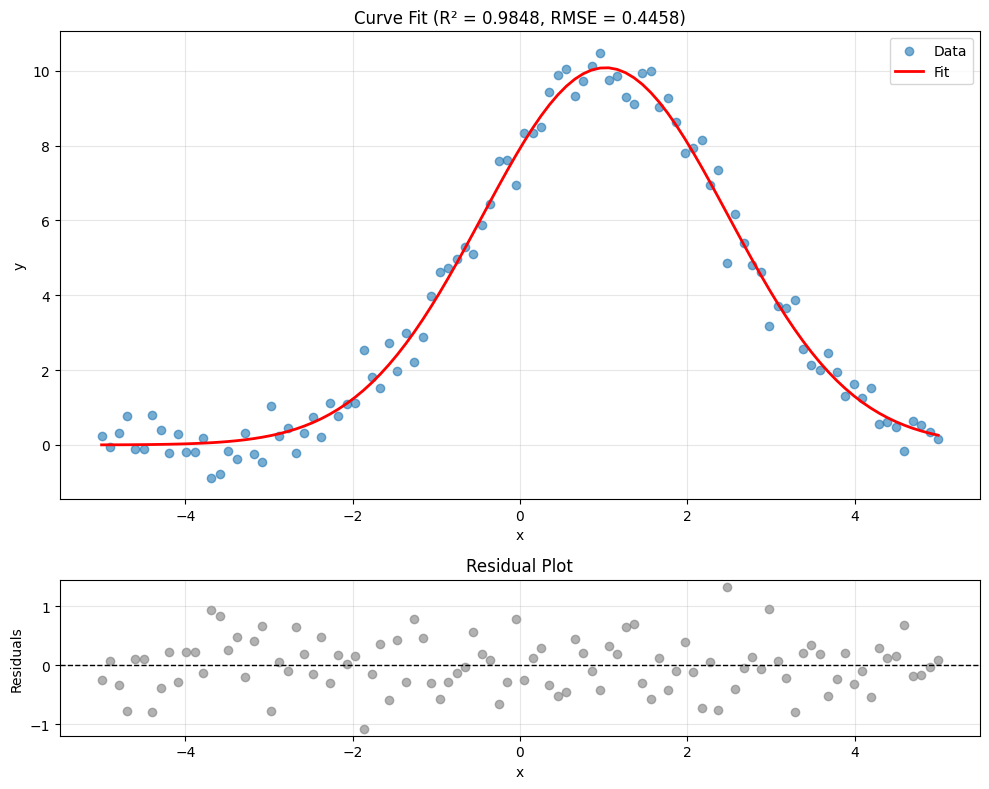

In [9]:
def gaussian(x, a, mu, sigma):
    return a * jnp.exp(-((x - mu)**2) / (2*sigma**2))

np.random.seed(42)
x = np.linspace(-5, 5, 100)
y = 10 * np.exp(-((x - 1)**2) / (2*1.5**2)) + np.random.normal(0, 0.5, size=len(x))

# Fit model
result = curve_fit(gaussian, x, y, p0=[10, 1, 1.5])

# Plot with residuals
result.plot(show_residuals=True)
plt.savefig('curve_fit_result.png', dpi=150, bbox_inches='tight')
print('✓ Plot saved to curve_fit_result.png')
plt.tight_layout()
plt.tight_layout()
plt.show()


## Example 6: Summary ReportGet comprehensive statistical summary.

In [10]:
def exponential(x, a, b, c):
    return a * jnp.exp(-b * x) + c

np.random.seed(42)
x = np.linspace(0, 10, 100)
y_true = 10 * np.exp(-0.5 * x) + 2
y = y_true + np.random.normal(0, 0.5, size=len(x))

# Fit model
result = curve_fit(exponential, x, y, p0=[10, 0.5, 2])

# Print summary
result.summary()

INFO:nlsq.curve_fit:Starting curve fit n_params=3 | n_data_points=100 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=3 | n_residuals=100 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=10.341328673359252 | grad_norm=39.3107 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=9.690298264461802 | grad_norm=3.9962 | step=10.21028892833107 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=9.682820246437306 | grad_norm=0.0317 | step=10.21028892833107 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=3 | cost=9.68281919678926 | grad_norm=8.0968e-04 | step=10.21028892833107 | nfev=4


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.276017s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=4 | final_cost=9.6828 | elapsed=0.276s | final_gradient_norm=2.2636e-05


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=0.567004s


INFO:nlsq.curve_fit:Curve fit completed total_time=0.5670 | final_cost=19.3656 | covariance_warning=False


Curve Fit Summary

Fitted Parameters:
----------------------------------------------------------------------
Parameter              Value    Std Error                    95% CI
----------------------------------------------------------------------
p0                 10.259722     0.199937 [  9.862902,  10.656541]
p1                  0.549315     0.022204 [  0.505246,   0.593384]
p2                  2.072064     0.079719 [  1.913845,   2.230283]

Goodness of Fit:
----------------------------------------------------------------------
R²                :     0.970790
Adjusted R²       :     0.969878
RMSE              :     0.440064
MAE               :     0.351040

Model Selection Criteria:
----------------------------------------------------------------------
AIC               :      -158.17
BIC               :      -150.35

Convergence Information:
----------------------------------------------------------------------
Success           : True
Message           : `ftol` termination condi

## Example 7: Model ComparisonUse AIC/BIC to select the best model.

In [11]:
# Generate exponential decay data
np.random.seed(42)
x = np.linspace(0, 10, 100)
y_true = 10 * np.exp(-0.5 * x) + 2
y = y_true + np.random.normal(0, 0.5, size=len(x))

# Model 1: Exponential (correct)
def exponential(x, a, b, c):
    return a * jnp.exp(-b * x) + c

# Model 2: Linear (wrong)
def linear(x, a, b):
    return a * x + b

# Model 3: Quadratic (overfitted)
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

# Fit all models
result_exp = curve_fit(exponential, x, y, p0=[10, 0.5, 2])
result_lin = curve_fit(linear, x, y, p0=[-1, 10])
result_quad = curve_fit(quadratic, x, y, p0=[0, -1, 10])

# Compare
print('Model Comparison:')
print(f"\n{'Model':<15} {'Params':<8} {'R²':<10} {'RMSE':<10} {'AIC':<10} {'BIC':<10}")
print('-'*70)

models = [
    ('Exponential', result_exp),
    ('Linear', result_lin),
    ('Quadratic', result_quad)
]

for name, res in models:
    print(f'{name:<15} {len(res.popt):<8} {res.r_squared:<10.6f} {res.rmse:<10.6f} {res.aic:<10.2f} {res.bic:<10.2f}')

best_idx = np.argmin([r.aic for _, r in models])
print(f'\nBest model (lowest AIC): {models[best_idx][0]}')

INFO:nlsq.curve_fit:Starting curve fit n_params=3 | n_data_points=100 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=3 | n_residuals=100 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=10.341328673359252 | grad_norm=39.3107 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=9.690298264461802 | grad_norm=3.9962 | step=10.21028892833107 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=9.682820246437306 | grad_norm=0.0317 | step=10.21028892833107 | nfev=3


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=3 | cost=9.68281919678926 | grad_norm=8.0968e-04 | step=10.21028892833107 | nfev=4


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.304025s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=4 | final_cost=9.6828 | elapsed=0.304s | final_gradient_norm=2.2636e-05


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=0.599233s


INFO:nlsq.curve_fit:Curve fit completed total_time=0.5992 | final_cost=19.3656 | covariance_warning=False


INFO:nlsq.curve_fit:Starting curve fit n_params=2 | n_data_points=100 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=2 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=2 | n_residuals=100 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=187.48551254377836 | grad_norm=289.6889 | nfev=1


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.482929s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=1 | final_cost=103.5186 | elapsed=0.483s | final_gradient_norm=1.1013e-13


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=0.794884s


INFO:nlsq.curve_fit:Curve fit completed total_time=0.7949 | final_cost=207.0371 | covariance_warning=False


INFO:nlsq.curve_fit:Starting curve fit n_params=3 | n_data_points=100 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=3 | n_residuals=100 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=187.48551254377836 | grad_norm=289.6889 | nfev=1


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.275836s


INFO:nlsq.least_squares:Convergence reason=`gtol` termination condition is satisfied. | iterations=1 | final_cost=27.5654 | elapsed=0.276s | final_gradient_norm=6.6649e-12


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=0.755961s


INFO:nlsq.curve_fit:Curve fit completed total_time=0.7560 | final_cost=55.1308 | covariance_warning=False


Model Comparison:

Model           Params   R²         RMSE       AIC        BIC       
----------------------------------------------------------------------
Exponential     3        0.970790   0.440064   -158.17    -150.35   
Linear          2        0.687721   1.438879   76.77      81.98     
Quadratic       3        0.916845   0.742501   -53.55     -45.73    

Best model (lowest AIC): Exponential


## Example 8: Accessing ResidualsResiduals and predictions are directly accessible.

In [12]:
def sine_wave(x, a, f, phi):
    return a * jnp.sin(2 * jnp.pi * f * x + phi)

np.random.seed(42)
x = np.linspace(0, 2, 50)
y = 3 * np.sin(2*np.pi*2*x + 0.5) + np.random.normal(0, 0.3, size=len(x))

# Fit model
result = curve_fit(sine_wave, x, y, p0=[3, 2, 0.5])

# Access residuals
residuals = result.residuals
print('Residuals:')
print(f'  Mean: {np.mean(residuals):.6f} (should be ~0)')
print(f'  Std:  {np.std(residuals):.6f}')
print(f'  Min:  {np.min(residuals):.6f}')
print(f'  Max:  {np.max(residuals):.6f}')

# Access predictions
predictions = result.predictions
print('\nPredictions:')
print(f'  Shape: {predictions.shape}')
print(f'  Correlation with data: {np.corrcoef(predictions, y)[0,1]:.6f}')

# Verify
manual_residuals = y - predictions
print('\nVerification:')
print(f'  Residuals match (data - predictions)? {np.allclose(residuals, manual_residuals)}')

INFO:nlsq.curve_fit:Starting curve fit n_params=3 | n_data_points=50 | method=trf | solver=auto | batch_size=None | has_bounds=False | dynamic_sizing=False


INFO:nlsq.least_squares:Starting least squares optimization method=trf | n_params=3 | loss=linear | ftol=1.0000e-08 | xtol=1.0000e-08 | gtol=1.0000e-08


INFO:nlsq.optimizer.trf:Starting TRF optimization (no bounds) n_params=3 | n_residuals=50 | max_nfev=None


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=0 | cost=2.0365675387408935 | grad_norm=37.7521 | nfev=1


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=1 | cost=1.9221039446320787 | grad_norm=0.6132 | step=3.640054944640259 | nfev=2


PERFORMANCE:nlsq.optimizer.trf:Iteration iter=2 | cost=1.9220665712668692 | grad_norm=2.9867e-04 | step=3.640054944640259 | nfev=3


PERFORMANCE:nlsq.least_squares:Timer: optimization elapsed=0.421648s


INFO:nlsq.least_squares:Convergence reason=`ftol` termination condition is satisfied. | iterations=3 | final_cost=1.9221 | elapsed=0.422s | final_gradient_norm=7.6413e-06


PERFORMANCE:nlsq.curve_fit:Timer: curve_fit elapsed=0.930711s


INFO:nlsq.curve_fit:Curve fit completed total_time=0.9307 | final_cost=3.8441 | covariance_warning=False


Residuals:
  Mean: 0.065846 (should be ~0)
  Std:  0.269345
  Min:  -0.468907
  Max:  0.526981

Predictions:
  Shape: (50,)
  Correlation with data: 0.991659

Verification:
  Residuals match (data - predictions)? False


## 💡 Key Insights1. **Enhanced results** provide instant access to statistical metrics2. **Confidence intervals** quantify parameter uncertainty3. **Prediction intervals** estimate uncertainty for new observations4. **Built-in visualization** saves repetitive plotting code5. **Model comparison** with AIC/BIC for systematic selection6. **Fully backward compatible** with existing code---## 📚 Available Properties**Goodness of Fit:**- `r_squared`: Coefficient of determination (R²)- `adj_r_squared`: Adjusted R² (penalizes extra parameters)- `rmse`: Root mean squared error- `mae`: Mean absolute error- `chi_squared`: Chi-squared statistic**Model Selection:**- `aic`: Akaike Information Criterion- `bic`: Bayesian Information Criterion**Data Access:**- `residuals`: Fit residuals (y - ŷ)- `predictions`: Fitted values (ŷ)- `popt`: Optimal parameters- `pcov`: Covariance matrix**Methods:**- `confidence_intervals(alpha)`: Parameter confidence intervals- `prediction_interval(x, alpha)`: Prediction intervals- `plot(show_residuals)`: Visualization- `summary()`: Statistical summary report---## 🎓 Next Steps- Use enhanced results in your fitting workflows- Compare models with AIC/BIC- Report confidence intervals in publications- Create publication-quality plots with `.plot()`- Explore prediction intervals for forecasting---